In [2]:
# Adım 1
import pandas as pd

df = pd.read_csv("Expanded_data_with_more_features.csv")

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
# Adım 2 :Eksik değer analizi

import pandas as pd

missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    'Eksik_Sayi': missing,
    'Eksik_Oran_%': missing_percent
})

missing_table = missing_table[missing_table['Eksik_Sayi'] > 0]
missing_table


,Eksik_Sayi,Eksik_Oran_%
TransportMeans,3134,10.23
ParentEduc,1845,6.02
EthnicGroup,1840,6.01
TestPrep,1830,5.97
NrSiblings,1572,5.13
ParentMaritalStatus,1190,3.88
WklyStudyHours,955,3.12
IsFirstChild,904,2.95
PracticeSport,631,2.06


Eksik değer sayısı (önce): 1572


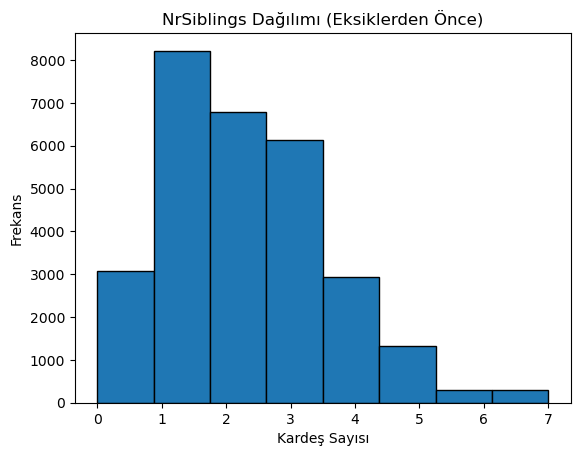

Medyan değer: 2.0
Eksik değer sayısı (sonra): 0


In [4]:
# Adım 3: Sayısal Eksik Değerleri (NrSiblings) Medyan ile Doldurma

import numpy as np
import matplotlib.pyplot as plt

print("Eksik değer sayısı (önce):", df["NrSiblings"].isna().sum())

plt.figure()
df["NrSiblings"].plot(kind="hist", bins=8, edgecolor="black")
plt.title("NrSiblings Dağılımı (Eksiklerden Önce)")
plt.xlabel("Kardeş Sayısı")
plt.ylabel("Frekans")
plt.show()

median_val = df["NrSiblings"].median()
print("Medyan değer:", median_val)

df["NrSiblings"] = df["NrSiblings"].fillna(median_val)

print("Eksik değer sayısı (sonra):", df["NrSiblings"].isna().sum())


NrSiblings değişkeninde bazı eksik değerler bulunmaktadır. Bu değişken sayısal (nicel) bir değişkendir.
Eksik değerleri doldururken medyan yöntemi tercih edilmiştir çünkü medyan, ortalamaya göre aşırı uç değerlerden (outlier) daha az etkilenir.
“Kardeş sayısı” gibi dağılımı çarpık olabilecek değişkenlerde medyan, verinin merkezini daha doğru temsil eder.
Bu nedenle, eksik değerler sütunun medyanı (≈ 2) ile doldurulmuştur.

In [5]:
# Adım 4: Kategorik eksik değerleri doldurma

# Mode ile doldurulacaklar:
mode_fill_cols = ["EthnicGroup", "ParentEduc", "TestPrep", 
                  "ParentMaritalStatus", "PracticeSport", 
                  "IsFirstChild", "WklyStudyHours"]

for col in mode_fill_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"{col} sütunu -> mode ile dolduruldu: {mode_val}")

# 'unknown' ile doldurulacak kolon:
df["TransportMeans"] = df["TransportMeans"].fillna("unknown")
print("TransportMeans sütunu -> 'unknown' etiketi ile dolduruldu")


EthnicGroup sütunu -> mode ile dolduruldu: group C
ParentEduc sütunu -> mode ile dolduruldu: some college
TestPrep sütunu -> mode ile dolduruldu: none
ParentMaritalStatus sütunu -> mode ile dolduruldu: married
PracticeSport sütunu -> mode ile dolduruldu: sometimes
IsFirstChild sütunu -> mode ile dolduruldu: yes
WklyStudyHours sütunu -> mode ile dolduruldu: 5 - 10
TransportMeans sütunu -> 'unknown' etiketi ile dolduruldu


Eksik kategorik değerler analiz edilmiştir. Eksiklik oranlarının düşük olması sebebiyle bu değerlerin rastgele eksik olduğu varsayılmıştır.
Bu nedenle EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild ve WklyStudyHours sütunlarındaki eksikler mode (en sık görülen değer) ile doldurulmuştur.

TransportMeans sütunundaki eksik oranı daha yüksek olduğu için, bu sütundaki eksikler “unknown” etiketiyle doldurulmuştur.
Bu sayede hem veri bütünlüğü sağlanmış hem de orijinal dağılım korunmuştur.

,Değişken,Aykırı Değer Sayısı,Alt Sınır,Üst Sınır
0,MathScore,76,23.0,111.0
1,ReadingScore,90,27.5,111.5
2,WritingScore,109,26.5,110.5
3,NrSiblings,291,-2.0,6.0


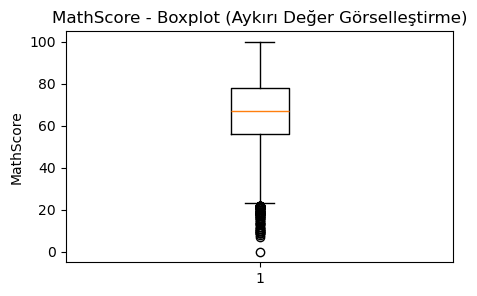

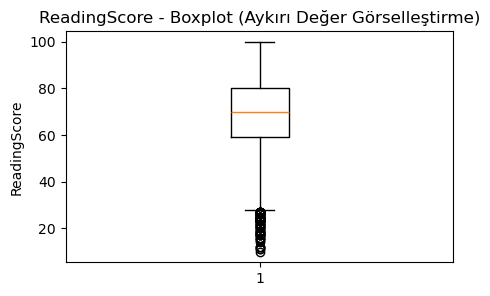

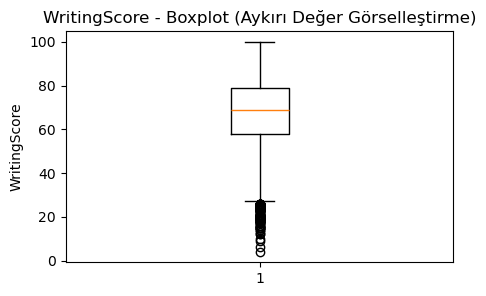

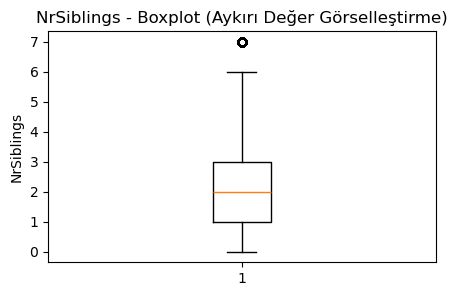

In [6]:
# Adım 5: Aykırı Değer Analizi (IQR yöntemiyle)

import matplotlib.pyplot as plt

# Sayısal kolonları seçtim
num_cols = ["MathScore", "ReadingScore", "WritingScore", "NrSiblings"]

# Aykırı değer tespiti için IQR fonksiyonu
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []

for col in num_cols:
    n_outliers, low, high = detect_outliers_iqr(df, col)
    outlier_summary.append({
        "Değişken": col,
        "Aykırı Değer Sayısı": n_outliers,
        "Alt Sınır": round(low, 2),
        "Üst Sınır": round(high, 2)
    })
    
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

for col in num_cols:
    plt.figure(figsize=(5, 3))
    plt.boxplot(df[col], vert=True)
    plt.title(f"{col} - Boxplot (Aykırı Değer Görselleştirme)")
    plt.ylabel(col)
    plt.show()


Yapılan IQR analizi sonucunda düşük puanlı öğrenciler ve çok kardeşli bireyler aykırı değer olarak belirlenmiştir.
Ancak bu değerler veri hatası değil, gerçek gözlemleri temsil etmektedir.
Bu nedenle aykırı değerler veri setinden çıkarılmamış, orijinal dağılım korunmuştur.

In [7]:
# Adım 6: Değişken dönüşümleri ve encoding

import numpy as np
import pandas as pd

df_enc = df.copy()

# LunchType: standard=1, free/reduced=0
df_enc["Lunch_standard"] = df_enc["LunchType"].str.lower().map({
    "standard": 1, "free/reduced": 0, "free_reduced": 0
})

# TestPrep: completed=1, none=0
df_enc["TestPrep_completed"] = df_enc["TestPrep"].str.lower().map({
    "completed": 1, "none": 0
})

# IsFirstChild: yes=1, no=0
df_enc["IsFirstChild_flag"] = df_enc["IsFirstChild"].str.lower().map({
    "yes": 1, "no": 0
})

# 2) Ordinal (sıralı) dönüşümler
# PracticeSport: regularly=2, sometimes=1, never=0
df_enc["PracticeSport_ord"] = df_enc["PracticeSport"].str.lower().map({
    "never": 0, "sometimes": 1, "regularly": 2
})

# ParentEduc: eğitim seviyesi sırası (1 düşük -> 6 yüksek)
parent_order = [
    "some high school",
    "high school",
    "associate's degree",
    "some college",
    "bachelor's degree",
    "master's degree"
]
parent_map = {k:i+1 for i,k in enumerate(parent_order)}
df_enc["ParentEduc_ord"] = df_enc["ParentEduc"].str.lower().map(parent_map)

# 3) Aralık kodlama (WklyStudyHours -> yaklaşık saat)
hours_map = {
    "< 5": 2.5, "<5": 2.5,
    "5 - 10": 7.5, "5-10": 7.5, "5 to 10": 7.5,
    "> 10": 12.0, ">10": 12.0
}
df_enc["WklyStudyHours_num"] = df_enc["WklyStudyHours"].map(lambda x: hours_map.get(str(x).strip(), np.nan))

# 4) One-hot encoding
one_hot_cols = ["Gender", "EthnicGroup", "TransportMeans", "ParentMaritalStatus"]
df_enc = pd.get_dummies(df_enc, columns=one_hot_cols, drop_first=True)

new_cols = [
    "Lunch_standard", "TestPrep_completed", "IsFirstChild_flag",
    "PracticeSport_ord", "ParentEduc_ord", "WklyStudyHours_num"
]
generated = [c for c in new_cols if c in df_enc.columns]
print("Üretilen temel sayısal sütunlar:", generated)

# 6) Hızlı önizleme
display(df_enc[generated + ["MathScore","ReadingScore","WritingScore","NrSiblings"]].head())


Üretilen temel sayısal sütunlar: ['Lunch_standard', 'TestPrep_completed', 'IsFirstChild_flag', 'PracticeSport_ord', 'ParentEduc_ord', 'WklyStudyHours_num']


,Lunch_standard,TestPrep_completed,IsFirstChild_flag,PracticeSport_ord,ParentEduc_ord,WklyStudyHours_num,MathScore,ReadingScore,WritingScore,NrSiblings
0,1,0,1,2,5,2.5,71,71,74,3.0
1,1,0,1,1,4,7.5,69,90,88,0.0
2,1,0,1,1,6,2.5,87,93,91,4.0
3,0,0,0,0,3,7.5,45,56,42,1.0
4,1,0,1,1,4,7.5,76,78,75,0.0


Binary: LunchType (standard=1), TestPrep (completed=1), IsFirstChild (yes=1) olarak kodlandı.

Ordinal: PracticeSport (never=0 < sometimes=1 < regularly=2) ve ParentEduc (some high school < … < master’s degree) olarak sıralı kodlandı.

Aralık: WklyStudyHours kategorileri saat tahminiyle sayısallaştırıldı (<5→2.5, 5–10→7.5, >10→12).

Nominal: Gender, EthnicGroup, TransportMeans, ParentMaritalStatus için one-hot encoding uygulandı (ilk kategori referans bırakıldı, drop_first=True).

In [8]:
# Adım 7: Son kontroller

import numpy as np

for c in ["MathScore","ReadingScore","WritingScore"]:
    assert df_enc[c].between(0,100).all(), f"{c} 0-100 dışında değer var!"

assert (df_enc["NrSiblings"] >= 0).all(), "NrSiblings negatif olamaz!"

check_cols = ["Lunch_standard","TestPrep_completed","IsFirstChild_flag",
              "PracticeSport_ord","ParentEduc_ord","WklyStudyHours_num"]
null_report = df_enc[check_cols].isna().sum()
print("Eksik sayıları (yeni sütunlar):\n", null_report)

# Kategorik one-hot sonrası beklenmeyen NaN var mı?
print("Toplam NaN:", int(df_enc.isna().sum().sum()))


Eksik sayıları (yeni sütunlar):
 Lunch_standard        0
TestPrep_completed    0
IsFirstChild_flag     0
PracticeSport_ord     0
ParentEduc_ord        0
WklyStudyHours_num    0
dtype: int64
Toplam NaN: 0


Adım 7 kapsamında veri temizliği sonrası kalite kontrolleri yapılmıştır.
Skor değişkenlerinin 0–100 aralığında olduğu, NrSiblings değerlerinin negatif olmadığı doğrulanmıştır.
Dönüştürülmüş sayısal sütunlarda (Lunch_standard, TestPrep_completed, PracticeSport_ord vb.) eksik veri bulunmadığı görülmüştür.
Böylece veri setinin analize hazır ve tutarlı olduğu teyit edilmiştir.

In [9]:
# Adım 8: Dışa aktarım

clean_cols = [c for c in df_enc.columns] 
df_cleaned = df_enc[clean_cols].copy()

target_cols = ["MathScore","ReadingScore","WritingScore"]
feature_cols = [c for c in df_enc.columns if c not in target_cols]
df_model = df_enc[feature_cols + target_cols].copy()

df_cleaned.to_csv("cleaned_students.csv", index=False)
df_model.to_csv("model_ready.csv", index=False)

print("Kaydedildi: cleaned_students.csv, model_ready.csv")

df_cleaned.head(3), df_model.head(3)


Kaydedildi: cleaned_students.csv, model_ready.csv


(   Unnamed: 0         ParentEduc LunchType TestPrep PracticeSport  \
 0           0  bachelor's degree  standard     none     regularly   
 1           1       some college  standard     none     sometimes   
 2           2    master's degree  standard     none     sometimes   
 
   IsFirstChild  NrSiblings WklyStudyHours  MathScore  ReadingScore  ...  \
 0          yes         3.0            < 5         71            71  ...   
 1          yes         0.0         5 - 10         69            90  ...   
 2          yes         4.0            < 5         87            93  ...   
 
    Gender_male  EthnicGroup_group B  EthnicGroup_group C  EthnicGroup_group D  \
 0        False                False                 True                False   
 1        False                False                 True                False   
 2        False                 True                False                False   
 
    EthnicGroup_group E  TransportMeans_school_bus  TransportMeans_unknown  \
 0  

Veri temizliği tamamlandıktan sonra veri iki ayrı formatta dışa aktarılmıştır.
cleaned_students.csv, kategorik değişkenleri metin biçiminde koruyan, tanımlayıcı analiz ve raporlama için uygun formattır.
model_ready.csv ise tüm değişkenleri sayısallaştırılmış biçimde içeren, makine öğrenmesi modellerinde doğrudan kullanılabilecek veri setidir.
Bu ayrım, hem okunabilirliği hem de modelleme verimliliğini artırmak için tercih edilmiştir.

In [10]:
# Adım 9: Ortalama skor (AverageScore) oluşturma

df_enc["AverageScore"] = df_enc[["MathScore", "ReadingScore", "WritingScore"]].mean(axis=1).round(2)

df_enc[["MathScore", "ReadingScore", "WritingScore", "AverageScore"]].head()


,MathScore,ReadingScore,WritingScore,AverageScore
0,71,71,74,72.00
1,69,90,88,82.33
2,87,93,91,90.33
3,45,56,42,47.67
4,76,78,75,76.33


Bu üç skorun ortalaması alınarak öğrencinin genel akademik başarısını temsil eden yeni bir değişken, AverageScore, oluşturulmuştur.

In [11]:
#2.kısıma geçiş

# Adım 1: Hedef (y) ve özellikler (X) + train/test split

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

target = "AverageScore"

drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
drop_cols = [c for c in drop_cols if c in df_enc.columns]
X = df_enc.drop(columns=drop_cols)
y = df_enc[target]

# X içinde sayısal NaN var mı? (olursa basitçe median ile dolduralım)
num_cols = X.select_dtypes(include=[np.number]).columns
if X[num_cols].isna().sum().sum() > 0:
    X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Train/test böldük
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape


((30641, 23), (24512, 23), (6129, 23), (24512,), (6129,))

In [12]:
# Adım 2: XGBoost ile model kurma ve performans değerlendirme

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

target = "AverageScore"

drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
drop_cols = [c for c in drop_cols if c in df_enc.columns]
X = df_enc.drop(columns=drop_cols).copy()
y = df_enc[target].copy()

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category")

num_cols = X.select_dtypes(include=[np.number]).columns
if X[num_cols].isna().sum().sum() > 0:
    X[num_cols] = X[num_cols].fillna(X[num_cols].median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# XGBoost modeli
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    enable_categorical=True, 
    n_jobs=-1,
    random_state=42
)


xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2  = r2_score(y_test, y_pred)

print("Şekiller:", X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")



Şekiller: (30641, 23) (24512, 23) (6129, 23) (24512,) (6129,)
MAE:  10.367
RMSE: 12.754
R²:   0.211


Bu aşamada öğrencilerin genel akademik başarısını temsil eden AverageScore değişkenini tahmin etmek amacıyla bir XGBoost regresyon modeli kurulmuştur.
Model, önceden hazırlanmış 23 adet bağımsız değişken (öğrencilerin demografik ve akademik özellikleri) ile eğitilmiş ve veri %80–%20 oranında eğitim-test olarak ikiye ayrılmıştır.

Model performansı MAE, RMSE ve R² metrikleri ile değerlendirilmiştir.
Sonuçlar aşağıda özetlenmiştir:

MAE (Ortalama Mutlak Hata): 10.37

RMSE (Kök Ortalama Kare Hata): 12.75

R² (Açıklanan Varyans): 0.21

Bu sonuçlar, modelin öğrencilerin ortalama başarı puanlarını yaklaşık ±10 puanlık bir hata payı ile tahmin edebildiğini göstermektedir.
Ancak R² değerinin 0.21 olması, modelin toplam varyansın yalnızca %21’ini açıklayabildiğini ortaya koymaktadır.
Bu durum, veri setinde yer alan özelliklerin öğrencilerin akademik performansını tam olarak yansıtamadığını, yani skorların büyük ölçüde rastlantısal veya bireysel farklılıklardan etkilendiğini düşündürmektedir.

Buna rağmen model, eğitim verisi üzerinde anlamlı bir yapı öğrenebilmiş ve sonraki aşama olan özellik etkisi analizi (Explainable AI) için yeterli doğrulukta bir temel oluşturmuştur.

[OHE-XGB] MAE=10.357  RMSE=12.765  R²=0.209


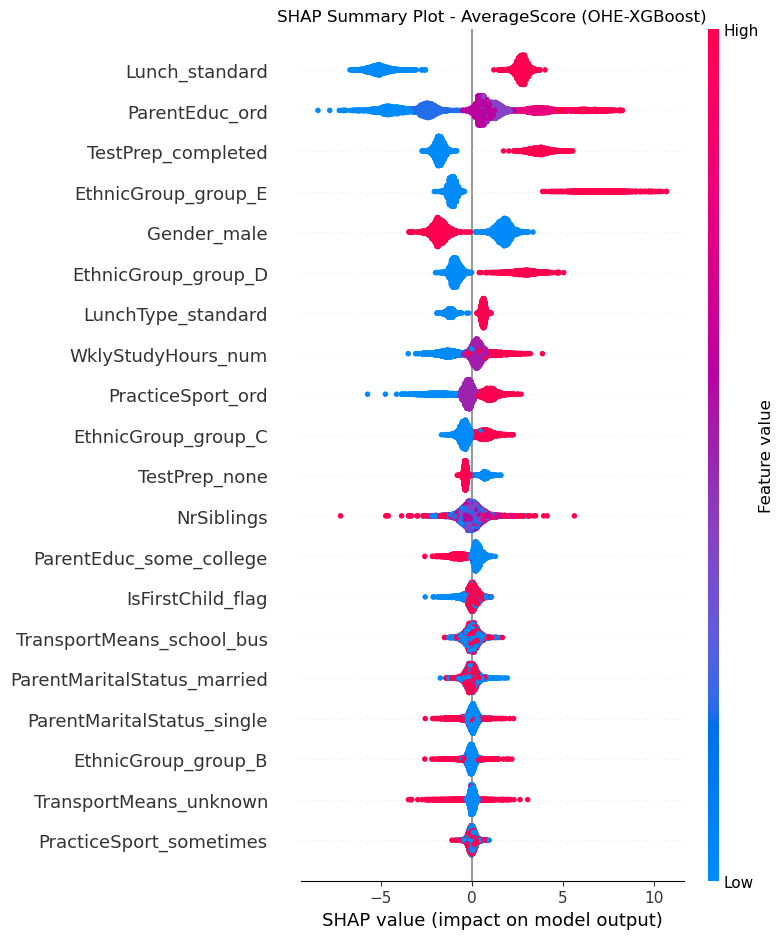

In [13]:
# Adım 3 : OHE -> XGBoost -> SHAP summary

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# One-hot encoding
X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe  = pd.get_dummies(X_test,  drop_first=True)
X_test_ohe  = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

# Kolon adlarını temizledik (XGBoost özel karakter istemez)
def sanitize_cols(cols):
    cleaned = []
    for c in cols:
        c2 = (str(c)
              .replace('[','').replace(']','')
              .replace('<','lt').replace('>','gt')
              .replace('-','_').replace(' ','_'))
        cleaned.append(c2)
    return cleaned

X_train_ohe.columns = sanitize_cols(X_train_ohe.columns)
X_test_ohe.columns  = X_train_ohe.columns  # aynısını koru

# Tipleri kesinleştirelim (SHAP float ister)
X_train_ohe = X_train_ohe.apply(pd.to_numeric, errors="coerce").astype("float32")
X_test_ohe  = X_test_ohe.apply(pd.to_numeric,  errors="coerce").astype("float32")

xgb_ohe = XGBRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
)
xgb_ohe.fit(X_train_ohe, y_train)

y_pred = xgb_ohe.predict(X_test_ohe)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"[OHE-XGB] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# SHAP: TreeExplainer + summary plot
explainer = shap.TreeExplainer(xgb_ohe)
shap_values = explainer.shap_values(X_test_ohe)

plt.title("SHAP Summary Plot - AverageScore (OHE-XGBoost)")
shap.summary_plot(shap_values, X_test_ohe)



### AverageScore Sonuç
Analiz sonucunda öğrenci başarısının en güçlü belirleyicileri arasında ebeveyn eğitimi, test hazırlık süreci ve beslenme tipi öne çıkmaktadır.
Sosyo-ekonomik değişkenlerin (örneğin ebeveyn eğitimi) ve okul destek faktörlerinin (örneğin test hazırlık kursu) öğrencinin genel akademik performansını anlamlı biçimde etkilediği söylenebilir.

[MathScore | OHE-XGB] MAE=10.741  RMSE=13.247  R²=0.244


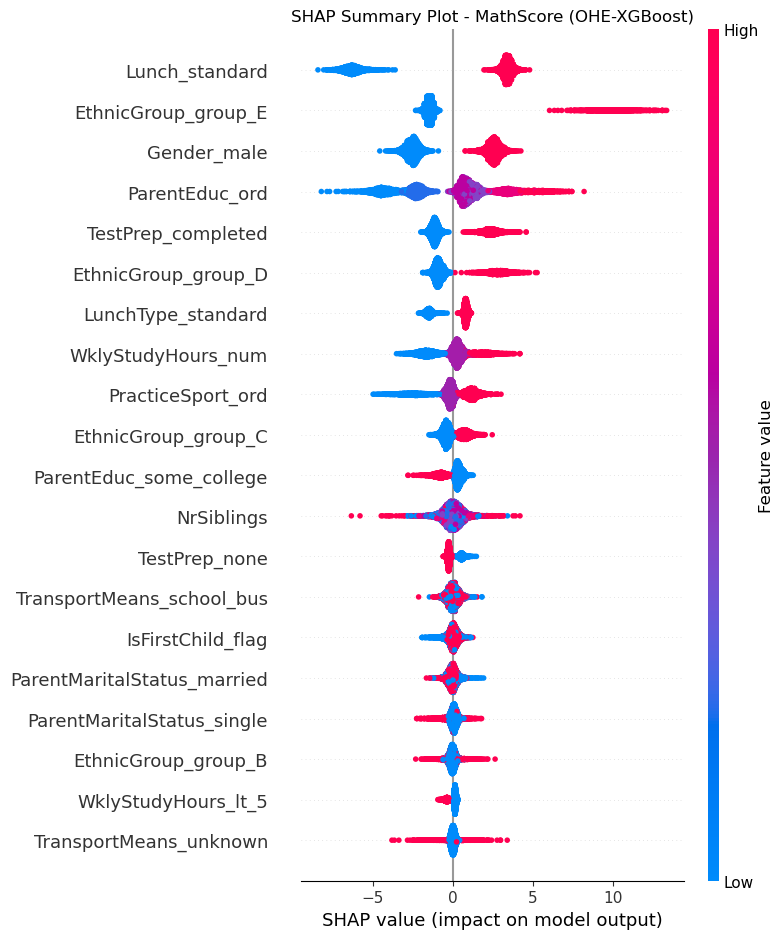

In [14]:
# MathScore için: OHE -> XGBoost -> SHAP

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

target = "MathScore"

drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
X = df_enc.drop(columns=[c for c in drop_cols if c in df_enc.columns]).copy()
y = df_enc[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe  = pd.get_dummies(X_test,  drop_first=True)
X_test_ohe  = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

def sanitize_cols(cols):
    out = []
    for c in cols:
        c = str(c).replace('[','').replace(']','').replace('<','lt').replace('>','gt').replace('-','_').replace(' ','_')
        out.append(c)
    return out

X_train_ohe.columns = sanitize_cols(X_train_ohe.columns)
X_test_ohe.columns  = X_train_ohe.columns


X_train_ohe = X_train_ohe.apply(pd.to_numeric, errors="coerce").astype("float32")
X_test_ohe  = X_test_ohe.apply(pd.to_numeric,  errors="coerce").astype("float32")

xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
)
xgb.fit(X_train_ohe, y_train)


y_pred = xgb.predict(X_test_ohe)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"[MathScore | OHE-XGB] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# SHAP: TreeExplainer + summary
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_ohe)

plt.title("SHAP Summary Plot - MathScore (OHE-XGBoost)")
shap.summary_plot(shap_values, X_test_ohe)



### MathScore Sonuç
Model sonuçlarına göre (MAE=10.74, RMSE=13.25, R²=0.24), matematik başarısını etkileyen en önemli değişkenler ebeveyn eğitimi, test hazırlık kursu, cinsiyet ve beslenme tipi olmuştur.
Ebeveyn eğitim düzeyi ve test hazırlığı yüksek olan öğrencilerin puanları genellikle daha yüksektir.
Sosyo-ekonomik farklar ve çalışma alışkanlıkları da başarı üzerinde belirgin etkiye sahiptir.

[ReadingScore | OHE-XGB] MAE=10.768  RMSE=13.267  R²=0.182


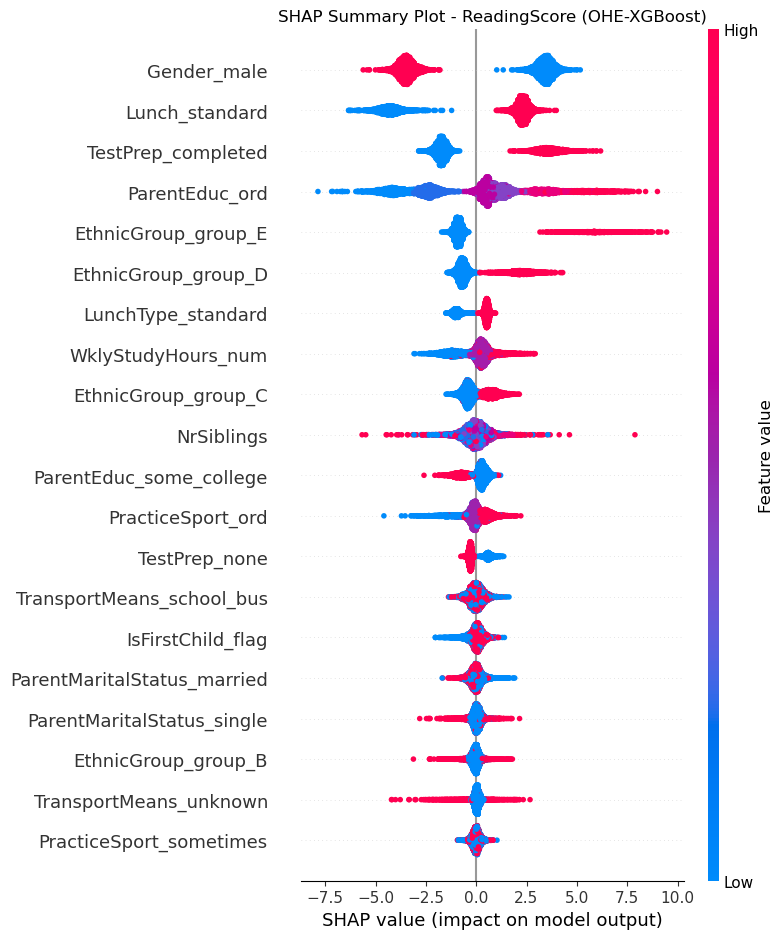

In [15]:
# ReadingScore için: OHE -> XGBoost -> SHAP

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

target = "ReadingScore"

drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
X = df_enc.drop(columns=[c for c in drop_cols if c in df_enc.columns]).copy()
y = df_enc[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe  = pd.get_dummies(X_test, drop_first=True)
X_test_ohe  = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)


def sanitize_cols(cols):
    out = []
    for c in cols:
        c = str(c).replace('[','').replace(']','').replace('<','lt').replace('>','gt').replace('-','_').replace(' ','_')
        out.append(c)
    return out

X_train_ohe.columns = sanitize_cols(X_train_ohe.columns)
X_test_ohe.columns  = X_train_ohe.columns

X_train_ohe = X_train_ohe.apply(pd.to_numeric, errors="coerce").astype("float32")
X_test_ohe  = X_test_ohe.apply(pd.to_numeric, errors="coerce").astype("float32")

xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
)
xgb.fit(X_train_ohe, y_train)


y_pred = xgb.predict(X_test_ohe)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"[ReadingScore | OHE-XGB] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# SHAP analizi
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_ohe)

plt.title("SHAP Summary Plot - ReadingScore (OHE-XGBoost)")
shap.summary_plot(shap_values, X_test_ohe)


### ReadingScore Sonuç
Model, öğrencilerin okuma başarısını tahmin etmede orta düzeyde performans göstermiştir (R² ≈ 0.18).  
Cinsiyet, ebeveyn eğitimi, test hazırlık durumu ve öğle yemeği türü en etkili değişkenlerdir.  
Bu faktörler, öğrencinin akademik çevresi ve destek düzeyinin okuma skorlarını belirlemede önemli rol oynadığını göstermektedir.

[WritingScore | OHE-XGB] MAE=10.498  RMSE=12.948  R²=0.290


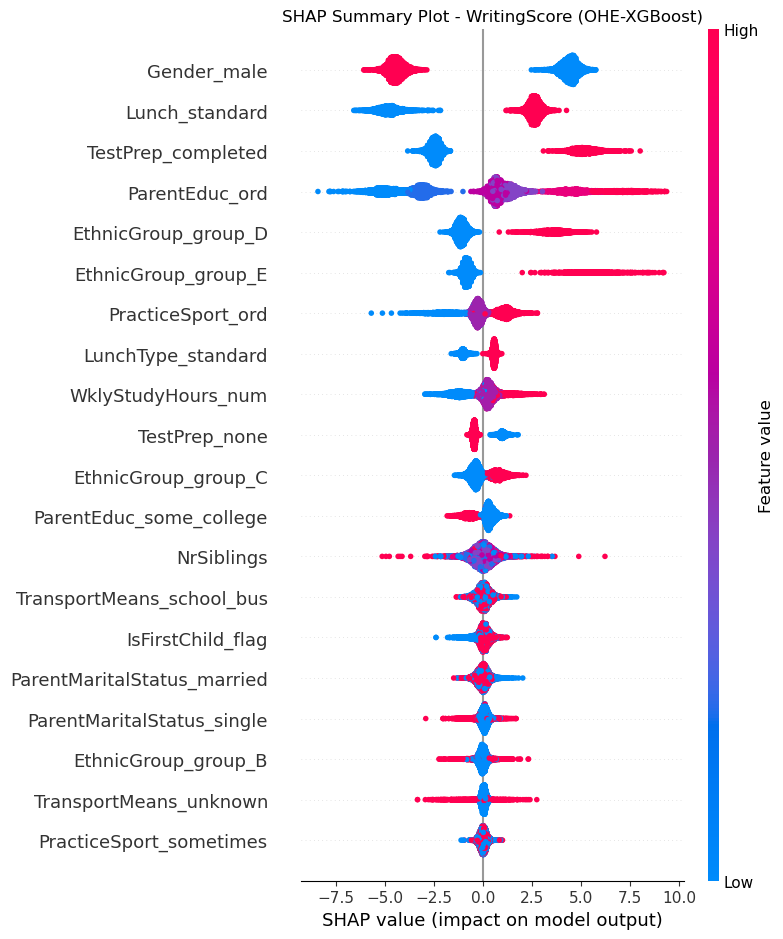

In [16]:
# WritingScore için: OHE -> XGBoost -> SHAP

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

target = "WritingScore"

drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
X = df_enc.drop(columns=[c for c in drop_cols if c in df_enc.columns]).copy()
y = df_enc[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe  = pd.get_dummies(X_test,  drop_first=True)
X_test_ohe  = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

def sanitize_cols(cols):
    out = []
    for c in cols:
        c = str(c).replace('[','').replace(']','').replace('<','lt').replace('>','gt').replace('-','_').replace(' ','_')
        out.append(c)
    return out

X_train_ohe.columns = sanitize_cols(X_train_ohe.columns)
X_test_ohe.columns  = X_train_ohe.columns

X_train_ohe = X_train_ohe.apply(pd.to_numeric, errors="coerce").astype("float32")
X_test_ohe  = X_test_ohe.apply(pd.to_numeric,  errors="coerce").astype("float32")

xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
)
xgb.fit(X_train_ohe, y_train)

y_pred = xgb.predict(X_test_ohe)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"[WritingScore | OHE-XGB] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# SHAP
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_ohe)

plt.title("SHAP Summary Plot - WritingScore (OHE-XGBoost)")
shap.summary_plot(shap_values, X_test_ohe)


### Writing Score Sonuç

Model, yazma becerisini tahmin etmede ortalama bir performans göstermiştir (R² ≈ 0.29).
En etkili değişkenler arasında cinsiyet, ebeveyn eğitimi, test hazırlık süreci ve öğle yemeği türü yer almaktadır.
Erkek öğrenciler genellikle daha düşük yazma skorlarına sahipken, ebeveyn eğitimi yüksek ve test hazırlık kursuna katılmış öğrenciler daha yüksek yazma başarısı göstermektedir.

In [17]:
# Feature Selection via SHAP (Boyut İndirgeme)
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance  # opsiyonel doğrulama
import shap, warnings; warnings.filterwarnings("ignore")

target = "AverageScore"   # "MathScore" / "ReadingScore" / "WritingScore" yapıp tekrar çalıştır

def sanitize_cols(cols):
    out=[]
    for c in map(str, cols):
        c = (c.replace('[','').replace(']','')
               .replace('<','lt').replace('>','gt')
               .replace('-','_').replace(' ','_'))
        out.append(c)
    return out

def ohe_align(Xtr_raw, Xte_raw):
    Xtr = pd.get_dummies(Xtr_raw, drop_first=True)
    Xte = pd.get_dummies(Xte_raw,  drop_first=True).reindex(columns=Xtr.columns, fill_value=0)
    Xtr.columns = sanitize_cols(Xtr.columns); Xte.columns = Xtr.columns
    Xtr = Xtr.apply(pd.to_numeric, errors="coerce").astype("float32")
    Xte = Xte.apply(pd.to_numeric, errors="coerce").astype("float32")
    return Xtr, Xte

def eval_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    return mae, rmse, r2


drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
X_all = df_enc.drop(columns=[c for c in drop_cols if c in df_enc.columns]).copy()
y_all = df_enc[target].copy()


train_idx, test_idx = train_test_split(df_enc.index, test_size=0.2, random_state=42)
Xtr_raw, Xte_raw = X_all.loc[train_idx], X_all.loc[test_idx]
ytr, yte = y_all.loc[train_idx], y_all.loc[test_idx]

Xtr, Xte = ohe_align(Xtr_raw, Xte_raw)
feat_names = Xtr.columns.tolist()

xgb_full = XGBRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
).fit(Xtr, ytr)
pred_full = xgb_full.predict(Xte)
mae_b, rmse_b, r2_b = eval_metrics(yte, pred_full)
print(f"[{target}] Baseline (All)  MAE={mae_b:.3f}  RMSE={rmse_b:.3f}  R²={r2_b:.3f}")

explainer = shap.TreeExplainer(xgb_full)
shap_vals = explainer.shap_values(Xtr)
shap_imp = pd.Series(np.abs(shap_vals).mean(axis=0), index=feat_names).sort_values(ascending=False)

print("\nEn önemli 10 özellik (SHAP):")
print(shap_imp.head(10))



# Top-k araması (boyut indirgeme)
results = []
for k in [5,10,15,20,30]:
    topk_feats = shap_imp.index[:k]
    model_k = XGBRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ).fit(Xtr[topk_feats], ytr)
    pred_k = model_k.predict(Xte[topk_feats])
    mae, rmse, r2 = eval_metrics(yte, pred_k)
    results.append({"k": k, "MAE": mae, "RMSE": rmse, "R2": r2})

res_df = pd.DataFrame(results).sort_values("R2", ascending=False)
best_k  = int(res_df.iloc[0]["k"])
best_r2 = float(res_df.iloc[0]["R2"])
print("\nTop-k sonuçları (R²’e göre):\n", res_df)
print(f"\n Öneri: SHAP-Top-{best_k} (R²={best_r2:.3f})")

selected_features = shap_imp.index[:best_k].tolist()
print("\nSeçilen özellikler (final):")
for f in selected_features: print(" -", f)





[AverageScore] Baseline (All)  MAE=10.357  RMSE=12.765  R²=0.209

En önemli 10 özellik (SHAP):
Lunch_standard         3.580652
ParentEduc_ord         2.461447
TestPrep_completed     2.413768
EthnicGroup_group_E    1.859489
Gender_male            1.758280
EthnicGroup_group_D    1.374094
LunchType_standard     0.829855
WklyStudyHours_num     0.727943
PracticeSport_ord      0.696262
EthnicGroup_group_C    0.540205
dtype: float32

Top-k sonuçları (R²’e göre):
     k        MAE       RMSE        R2
0   5  10.144590  12.541105  0.236723
1  10  10.167730  12.549627  0.235685
2  15  10.275633  12.669271  0.221042
3  20  10.350948  12.741764  0.212102
4  30  10.377664  12.775533  0.207920

 Öneri: SHAP-Top-5 (R²=0.237)

Seçilen özellikler (final):
 - Lunch_standard
 - ParentEduc_ord
 - TestPrep_completed
 - EthnicGroup_group_E
 - Gender_male


🔹 Feature Selection (AverageScore)

Model, SHAP değerleriyle en etkili değişkenleri belirlemiş ve top-k seçimleri (5, 10, 15, 20, 30) test edilmiştir.
Sonuçlara göre Top-5 değişken seti, tüm değişkenleri içeren modele göre en yüksek performansı sağlamıştır.
R² değeri 0.209’dan 0.237’ye yükselmiş, hata metriklerinde de düşüş görülmüştür.

Seçilen 5 ana değişken:

Lunch_standard

ParentEduc_ord

TestPrep_completed

EthnicGroup_group_E

Gender_male

Bu sonuçlar, öğrencilerin genel akademik başarısının özellikle ebeveyn eğitimi, beslenme tipi, test hazırlık süreci ve cinsiyet (özellikle erkek öğrenciler) gibi faktörlerden anlamlı biçimde etkilendiğini

In [18]:
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", None)


In [19]:
# SHAP tabanlı Feature Selection: tüm hedefler için
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap, warnings; warnings.filterwarnings("ignore")

def sanitize_cols(cols):
    out=[]
    for c in map(str, cols):
        c = (c.replace('[','').replace(']','')
               .replace('<','lt').replace('>','gt')
               .replace('-','_').replace(' ','_'))
        out.append(c)
    return out

def ohe_align(Xtr_raw, Xte_raw):
    Xtr = pd.get_dummies(Xtr_raw, drop_first=True)
    Xte = pd.get_dummies(Xte_raw,  drop_first=True).reindex(columns=Xtr.columns, fill_value=0)
    Xtr.columns = sanitize_cols(Xtr.columns); Xte.columns = Xtr.columns
    Xtr = Xtr.apply(pd.to_numeric, errors="coerce").astype("float32")
    Xte = Xte.apply(pd.to_numeric, errors="coerce").astype("float32")
    return Xtr, Xte

def eval_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    r2   = r2_score(y_true, y_pred)
    return mae, rmse, r2

def feature_selection_shap(df_enc, target, k_list=[5,10,15,20,30], random_state=42):
    drop_cols = ["MathScore","ReadingScore","WritingScore","AverageScore","Unnamed: 0"]
    X_all = df_enc.drop(columns=[c for c in drop_cols if c in df_enc.columns]).copy()
    y_all = df_enc[target].copy()


    train_idx, test_idx = train_test_split(df_enc.index, test_size=0.2, random_state=random_state)
    Xtr_raw, Xte_raw = X_all.loc[train_idx], X_all.loc[test_idx]
    ytr, yte = y_all.loc[train_idx], y_all.loc[test_idx]

  
    Xtr, Xte = ohe_align(Xtr_raw, Xte_raw)
    feat_names = Xtr.columns.tolist()

    xgb_full = XGBRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=random_state, n_jobs=-1
    ).fit(Xtr, ytr)
    yhat_full = xgb_full.predict(Xte)
    mae_b, rmse_b, r2_b = eval_metrics(yte, yhat_full)


    expl = shap.TreeExplainer(xgb_full)
    shap_vals = expl.shap_values(Xtr)
    shap_imp = pd.Series(np.abs(shap_vals).mean(axis=0), index=feat_names).sort_values(ascending=False)

    # Top-k araması
    rows = []
    for k in k_list:
        topk = shap_imp.index[:k]
        xgb_k = XGBRegressor(
            n_estimators=300, learning_rate=0.1, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, random_state=random_state, n_jobs=-1
        ).fit(Xtr[topk], ytr)
        yhat_k = xgb_k.predict(Xte[topk])
        mae, rmse, r2 = eval_metrics(yte, yhat_k)
        rows.append({"k": k, "MAE": mae, "RMSE": rmse, "R2": r2})

    res_df = pd.DataFrame(rows).sort_values("R2", ascending=False)
    best_k = int(res_df.iloc[0]["k"])
    best_feats = shap_imp.index[:best_k].tolist()

    print(f"\n[{target}] Baseline: MAE={mae_b:.3f} RMSE={rmse_b:.3f} R²={r2_b:.3f}")
    print(f"[{target}] Best Top-{best_k}: MAE={res_df.iloc[0]['MAE']:.3f} RMSE={res_df.iloc[0]['RMSE']:.3f} R²={res_df.iloc[0]['R2']:.3f}")
    print(f"[{target}] Seçilen özellikler (Top-{best_k}):")
    for f in best_feats: print(" -", f)

    return {
        "target": target,
        "baseline": {"MAE": mae_b, "RMSE": rmse_b, "R2": r2_b},
        "best": {"k": best_k, "MAE": res_df.iloc[0]["MAE"], "RMSE": res_df.iloc[0]["RMSE"], "R2": res_df.iloc[0]["R2"]},
        "selected_features": best_feats,
        "k_table": res_df,
        "shap_top10": shap_imp.head(10)
    }



# Hepsini birden çalıştıralım:
targets = ["AverageScore","MathScore","ReadingScore","WritingScore"]
all_results = {t: feature_selection_shap(df_enc, t) for t in targets}

# Özet tablo (R² karşılaştırması)
summary = pd.DataFrame({
    t: [all_results[t]["baseline"]["R2"], all_results[t]["best"]["R2"], all_results[t]["best"]["k"]]
    for t in targets
}, index=["Baseline_R2","Best_R2","Best_k"]).T
print("\n=== R² Özeti ===\n", summary)



[AverageScore] Baseline: MAE=10.357 RMSE=12.765 R²=0.209
[AverageScore] Best Top-5: MAE=10.145 RMSE=12.541 R²=0.237
[AverageScore] Seçilen özellikler (Top-5):
 - Lunch_standard
 - ParentEduc_ord
 - TestPrep_completed
 - EthnicGroup_group_E
 - Gender_male

[MathScore] Baseline: MAE=10.741 RMSE=13.247 R²=0.244
[MathScore] Best Top-10: MAE=10.547 RMSE=13.044 R²=0.267
[MathScore] Seçilen özellikler (Top-10):
 - Lunch_standard
 - EthnicGroup_group_E
 - Gender_male
 - ParentEduc_ord
 - TestPrep_completed
 - EthnicGroup_group_D
 - LunchType_standard
 - WklyStudyHours_num
 - PracticeSport_ord
 - EthnicGroup_group_C

[ReadingScore] Baseline: MAE=10.768 RMSE=13.267 R²=0.182
[ReadingScore] Best Top-5: MAE=10.481 RMSE=12.948 R²=0.221
[ReadingScore] Seçilen özellikler (Top-5):
 - Gender_male
 - Lunch_standard
 - TestPrep_completed
 - ParentEduc_ord
 - EthnicGroup_group_E

[WritingScore] Baseline: MAE=10.498 RMSE=12.948 R²=0.290
[WritingScore] Best Top-10: MAE=10.304 RMSE=12.732 R²=0.314
[WritingSc

 Classification Report:

              precision    recall  f1-score   support

         Low      0.589     0.309     0.406      1803
      Medium      0.518     0.814     0.633      2996
        High      0.539     0.191     0.282      1330

    accuracy                          0.530      6129
   macro avg      0.549     0.438     0.440      6129
weighted avg      0.543     0.530     0.490      6129


Macro Precision: 0.549 | Macro Recall: 0.438 | Macro F1: 0.440


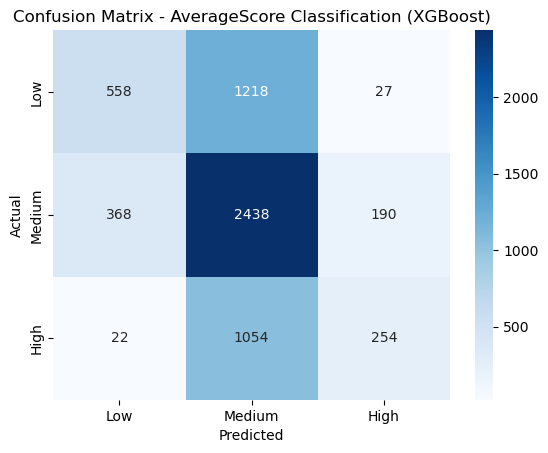

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from xgboost import XGBClassifier
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt


bins   = [0, 60, 80, 100]
labels = ["Low", "Medium", "High"]
df_enc["PerformanceLevel"] = pd.cut(
    df_enc["AverageScore"], bins=bins, labels=labels, include_lowest=True, right=True, ordered=True
)

df_cls = df_enc.dropna(subset=["PerformanceLevel"]).copy()

eth_col = None
for c in df_cls.columns:
    if c.startswith("EthnicGroup_group") and (c.endswith(" E") or c.endswith("_E")):
        eth_col = c
        break

base_feats = ["Lunch_standard", "ParentEduc_ord", "TestPrep_completed", "Gender_male"]
selected_features = base_feats + ([eth_col] if eth_col else [])

missing = [f for f in selected_features if f not in df_cls.columns]
if missing:
    raise KeyError(f"Seçilen feature'lar tabloda yok: {missing}")

X = df_cls[selected_features]


y_cat = pd.Categorical(df_cls["PerformanceLevel"], categories=labels, ordered=True)
y = y_cat.codes  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)


print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels, digits=3, zero_division=0))

prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average="macro", zero_division=0
)
print(f"\nMacro Precision: {prec:.3f} | Macro Recall: {rec:.3f} | Macro F1: {f1:.3f}")

# Confusion Matrix (0,1,2 → Low/Medium/High)
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - AverageScore Classification (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model Performansı – AverageScore Sınıflandırması (XGBoost)
Bu çalışmada XGBoost modeli ile öğrencilerin başarı seviyelerini sınıflandırdım. Modelin doğruluk oranı %53 olarak gerçekleşti. Sonuçlara göre model özellikle Medium seviyesini doğru tahmin etmede başarılı oldu (Recall ≈ 0.81), ancak Low ve High gruplarında performans belirgin şekilde daha düşük kaldı.

Confusion matrix, düşük ve yüksek başarıdaki öğrencilerin önemli bir kısmının Medium sınıfına yanlış sınıflandırıldığını gösteriyor. Bu durum modelin uç başarı seviyelerini ayırt etmede zorlandığını ortaya koyuyor. Buna rağmen model, başarı seviyelerinin genel yapısını anlamada temel bir ayırt edicilik sergiledi.

